In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using Plots, Interact
gr(size=(600,400))

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9972764836506817660\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6822771458803319969\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9972764836506817660\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

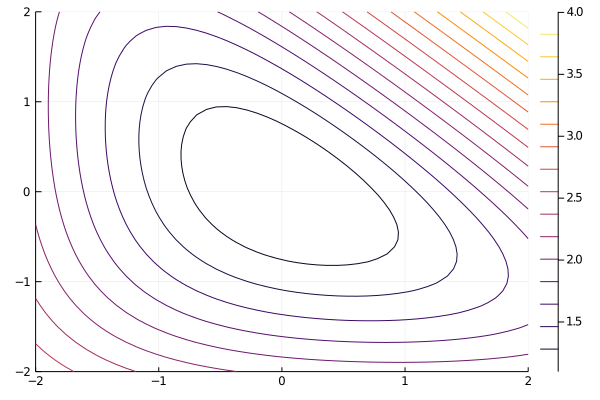

In [3]:
xg = range(-2, 2, length=50)
yg = copy(xg)

f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
contour(xg, yg, (x,y) -> f([x;y]))

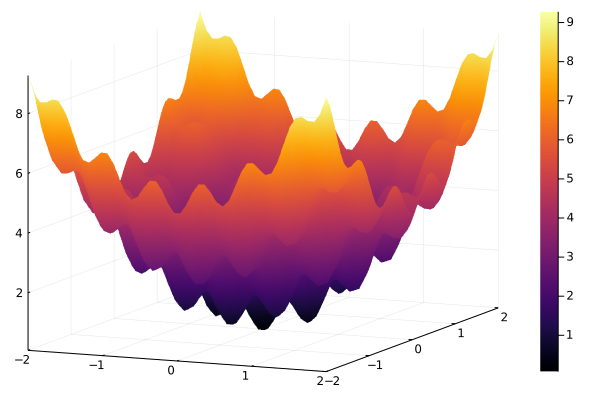

In [4]:
# f(x) = (x[1] - 1)^2 + 4 * (x[2] - x[1]^2)^2
f(x) = x[1]^2 + x[2]^2 + sin(5x[1])^2 + sin(4x[2])^2

surface(xg, yg, (x,y) -> f([x;y]), levels=100)

In [15]:
using ForwardDiff, LinearAlgebra
∇f(x) = ForwardDiff.gradient(f, x)
H(x) = ForwardDiff.gradient(f, x)

H (generic function with 1 method)

In [6]:
x = [-1.0; 0.0]
d = -∇f(x)

2-element Array{Float64,1}:
 -0.7201055544468487
 -0.0

In [7]:
function gradiente(f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    η = 1e-2
    num_backtrack = 0
    
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -∇f(x)
        
        # Armijo
        α = 1.0
        while f(x + α * d) ≥ f(x) + η * α * dot(d, ∇f(x))
            α = α / 2
            num_backtrack = num_backtrack + 1
            if α < 1e-8
                error("Erro no backtracking")
            end
        end
        x = x + α * d
        
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

gradiente (generic function with 1 method)

In [8]:
function gradiente_plot(p, f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    η = 1e-2
    num_backtrack = 0
    
    scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -∇f(x)
        
        # Armijo
        α = 1.0
        while f(x + α * d) ≥ f(x) + η * α * dot(d, ∇f(x))
            α = α / 2
            num_backtrack = num_backtrack + 1
            if α < 1e-8
                error("Erro no backtracking")
            end
        end
        xt = x + α * d
        plot!(p, [x[1], xt[1]], [x[2], xt[2]], c=:blue, l=:arrow)
        x = xt
        scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
        
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

gradiente_plot (generic function with 1 method)

In [9]:
function gradiente_cte_plot(p, f, x, αhat)
    ∇f(x) = ForwardDiff.gradient(f, x)
    η = 1e-2
    num_backtrack = 0
    
    scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -∇f(x)
        
        # Armijo
        xt = x + αhat * d
        plot!(p, [x[1], xt[1]], [x[2], xt[2]], c=:blue, l=:arrow)
        x = xt
        scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
        
        iter += 1
        if iter > 100
            break
        end
    end
    
    return x, iter, num_backtrack
end

gradiente_cte_plot (generic function with 1 method)

In [10]:
function newton(f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    H(x) = ForwardDiff.hessian(f, x)
    η = 1e-2
    num_backtrack = 0
    
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -H(x) \ ∇f(x)
        
        # Armijo
        α = 1.0
        while f(x + α * d) ≥ f(x) + η * α * dot(d, ∇f(x))
            α = α / 2
            num_backtrack = num_backtrack + 1
            if α < 1e-8
                error("Erro no backtracking")
            end
        end
        x = x + α * d
        
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

newton (generic function with 1 method)

In [18]:
# f(x) = x[1]^2 + x[2]^2 + sin(5x[1])^2 + sin(4x[2])^2
# f(x) = ((x[1] - 1)^2 + 4 * (x[2] - x[1]^2)^2) / 10
f(x) = 1.1 * log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
# f(x) = (x[1]^2 + 0.1*x[2]^2 - 0.2x[1] * x[2]) / 2

@manipulate for α in range(0.1, 2.0, length=100)
    p = plot(leg=false)
    contour!(p, xg, yg, (x,y) -> f([x;y]), levels=20)
    x, iter, nbk = gradiente_cte_plot(p, f, [-1.2; 1.0], α)
    # xlims!(0.9, 1.1)
    # ylims!(0.9, 1.1)
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f395e3d5870, Task (runnable) @0x00007f395e3d5870), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.119192\",\"0.138384\",\"0.157576\",\"0.176768\",\"0.19596\",\"0.215152\",\"0.234343\",\"0.253535\",\"0.272727\",\"0.291919\",\"0.311111\",\"0.330303\",\"0.349495\",\"0.368687\",\"0.387879\",\"0.407071\",\"0.426263\",\"0.445455\",\"0.464646\",\"0.4

In [12]:
∇f(x)

2-element Array{Float64,1}:
 -1.0
  0.1

In [13]:
eigen(H(x)).values

UndefVarError: UndefVarError: H not defined

In [14]:
newton(f, [-1.5; 1.0])

([0.0, 3.3306690738754696e-16], 1, 0)